In [3]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
link = "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(urlretrieve(link, 'advertising_and_sales_clean.csv')[0])
sales_df.drop("influencer", axis=1, inplace=True)

In [18]:
sales_df.head

<bound method NDFrame.head of            tv     radio  social_media      sales
0     16000.0   6566.23       2907.98   54732.76
1     13000.0   9237.76       2409.57   46677.90
2     41000.0  15886.45       2913.41  150177.83
3     83000.0  30020.03       6922.30  298246.34
4     15000.0   8437.41       1406.00   56594.18
...       ...       ...           ...        ...
4541  26000.0   4472.36        717.09   94685.87
4542  71000.0  20610.69       6545.57  249101.92
4543  44000.0  19800.07       5096.19  163631.46
4544  71000.0  17534.64       1940.87  253610.41
4545  42000.0  15966.69       5046.55  148202.41

[4546 rows x 4 columns]>

In [6]:

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape)

(4546, 1)


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns


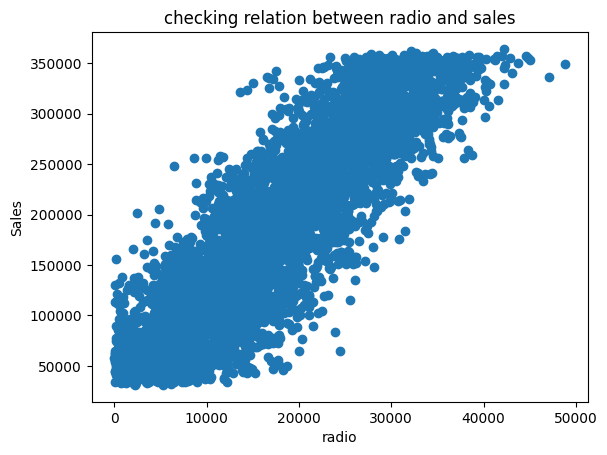

In [10]:
plt.scatter(X, y)
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('checking relation between radio and sales')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

reg = LinearRegression()
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)
reg.fit(X_train , y_train)
r_square = reg.score(X_test, y_test)
r_square = reg.score(X_test, y_test)
print(f'R-Square error is {r_square}')

y_hat = reg.predict(X_test)
Mean_square_error = mean_squared_error(y_test , y_hat)
print(f'Maen Squared error in target units is {Mean_square_error}')
rmse = mean_squared_error(y_test, y_hat, squared=False)

print(f'Root Maen Squared error in target units is {rmse}')


R-Square error is 0.9990152104759368
Maen Squared error in target units is 8669686.866907291
Root Maen Squared error in target units is 2944.4331996001015


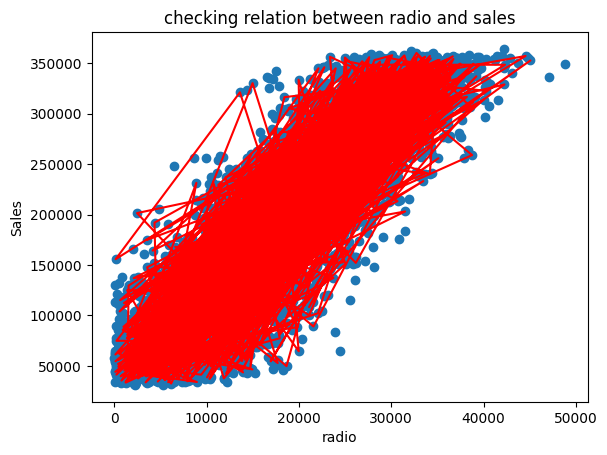

In [21]:
plt.scatter(X, y)
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('checking relation between radio and sales')

plt.plot(X_test, y_test, color = 'r')
plt.show()

In [22]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import pickle
import joblib
from sklearn.model_selection import train_test_split
link = "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(urlretrieve(link, 'advertising_and_sales_clean.csv')[0])
sales_df.drop("influencer", axis=1, inplace=True)
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
urlretrieve("https://assets.datacamp.com/production/repositories/5981/datasets/fe3b0d6585d21096ba30df5781ccbbdcb172da56/sales_model.pkl", "sales_model.pkl")
reg = joblib.load("sales_model.pkl")
y_pred = reg.predict(X_test)

c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [25]:
import pandas as pd
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
link = "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(urlretrieve(link, 'advertising_and_sales_clean.csv')[0])
sales_df.drop("influencer", axis=1, inplace=True)
X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values

In [31]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold( n_splits= 5, shuffle= True , random_state= 42)
reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

print(cv_scores)

[0.75647548 0.76253234 0.758791   0.73441243 0.7571537 ]


In [32]:
print (np.mean(cv_scores) ,np.std(cv_scores))

0.7538729903130994 0.009954101066890283


In [33]:
np.quantile(cv_scores, [0.025 , 0.975])

array([0.73661873, 0.76215821])

In [34]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


In [36]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
link = "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(urlretrieve(link, 'advertising_and_sales_clean.csv')[0])
sales_df.drop("influencer", axis=1, inplace=True)
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
sales_columns = sales_df.drop("sales", axis=1).columns

[ 3.56256962 -0.00397035  0.00496385]


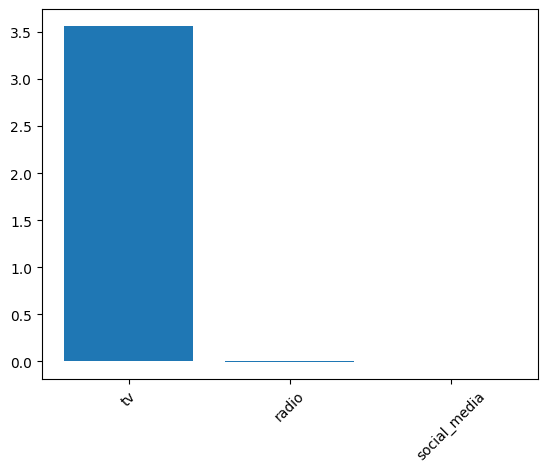

In [37]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()
